# Welcome to the Simulation and Random Variables Lab!

Today, you'll finish one more simulation and move on to exploring analysis of random variables all while catching Pokemon! :)

# Part 0: Your Groups!
Edit the next Python cell to add information about who you're working within your lab section:

In [ ]:
# First, write down the names of your TAs and CAs
ta_name = ""
ca1_name = ""
ca2_name = ""


# Also, make sure to meet your team for this lab! Find out their name, what major they're in,
# and learn something new about them that you never knew before!
partner1_name = ""
partner1_netid = ""
partner1_major = ""

partner2_name = ""
partner2_netid = ""
partner2_major = ""

partner3_name = ""
partner3_netid = ""
partner3_major = ""

# Part 1: Catching Pokemon!

## Puzzle 1.1: Pokemon Near You

There are 10 Pokemon near you right now! View them on your PokeDex by importing the `pokemon_near.csv` to the DataFrame below:

In [16]:
# Import pokemon_near.csv
import pandas as pd
import random
df_pokemon = pd.read_csv("pokemon_near.csv")
df_pokemon

,Name,Type
0,Bulbasaur,grass
1,Starmie,water
2,Gengar,ghost
3,Wartortle,water
4,Krabby,water
5,Psyduck,water
6,Seadra,water
7,Charizard,fire
8,Poliwag,water
9,Dewgong,water


Notice that there are:
* Seven Water type pokemon, and
* Three Non-Water type pokemon.

### First 5 Encounters

You want to catch **water** pokemon today so you go catch the **first 5 pokemon** you encounter out of the 10 that are near you. The order of the pokemon do not matter, so there are only four possible "first five encounters" (Assume each pokemon appears randomly and is equally likely to appear):

* Possible Encounters #1: Three Non-Waters, Two Waters
* Possible Encounters #2: Two Non-Waters, Three Waters
* Possible Encounters #3: One Non-Waters, Four Waters
* Possible Encounters #4: Zero Non-Waters, Five Waters

## Puzzle 1.2: Using Statistics

Compute the probability that you will **encounter all water pokemon** in the following cell. Remember:

* You are encountering 5 pokemon out of the 10 near your location, with water and non-water types of Pokemon.
* To encounter all five water pokemon, you must **NOT** encounter a non-water pokemon.
* The answer is **NOT** 0.25 (1 out of 4). Some starting encounters are more likely than others.

**Hint (double-click this cell to see it):** <span style="color:#ffffff00">This is a case of drawing without replacement.</span>

In [17]:
P_5waters = 7/10 * 6/9 * 5/8 * 4/7 * 3/6
P_5waters


0.08333333333333333

In [18]:
## == TEST CASES for Puzzle 1 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( abs((P_5waters ** (1/4)) - 0.5372849659) < 0.0001 ), "Your P_5waters appears to be incorrect."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



# Part 2: Simulating Pokemon Encounters

## Puzzle 2.1: Simulation of Encountering 5 Pokemon Once

Finding the probability of encountering exactly one, two, or all three non-water pokemon becomes increasingly complex. You **DO** have the math to do it (but the equations get VERY long quickly).

Instead of calculating the number of water pokemon, we can simulate this in Python! Create a **function** that simulates encountering your first five pokemon of the ten near your location. The function will `return` the total number of water pokemon encountered.

**Hint (double-click this cell to see it):** <span style="color:#ffffff00">random.sample</span>


In [35]:
def firstFiveWaters():
    first_sample = df_pokemon.sample(n = 5)
    water_sample = first_sample[first_sample.Type == "water"]
    sum = len(water_sample)
    return sum



In [36]:
# Here's a cell to run to test your function:
firstFiveWaters()


3

In [37]:
## == TEST CASES for Puzzle 2.1 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
has2 = False
has3 = False
has4 = False
has5 = False

for i in range(10000):
    v = firstFiveWaters()
    if (v == 2): has2 = True
    elif (v == 3): has3 = True
    elif (v == 4): has4 = True
    elif (v == 5): has5 = True
    else: assert( False ), f"Your five encounters had {v} waters, this is not possible. :("
    
    if (has2 and has3 and has4 and has5): break

assert( has2 ), "Your five encounters never had 2 waters. It is possible to have 3 non-waters and 2 waters."
assert( has3 ), "Your five encounters never had 3 waters. It is possible to have 2 non-waters and 3 waters."
assert( has4 ), "Your five encounters never had 4 waters. It is possible to have 1 non-waters and 4 waters."
assert( has5 ), "Your five encounters never had 5 waters. It is possible to have 0 non-waters and 5 waters."

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()

🎉 All tests passed! 🎉



## Puzzle 2.2: Simulation of 1,000 "First 5 Encounters"

Using your `firstFiveWaters()` function from Puzzle 2, simulate and store the number of water pokemon from at least 1,000 "first five encounters". Make sure to store the number of water pokemon encountered in a column named `waters`.


In [41]:
# Run your simulation:
data = []
for i in range(1000):
    waters = firstFiveWaters()
    d = {"waters": waters}
    data.append(d)


# Store your results as a DataFrame:
df = pd.DataFrame(data)

# Display a few random first 5 encounters...
df.sample(5)

,waters
23,5
746,2
118,4
759,3
185,3


## Puzzle 2.3: Building a Probability Histogram of Water Encounters

Create a probability histogram (or a density histogram) showing the number of water pokemon in the starting encounters you simulated. Choose the correct number of bins to create a density histogram that looks great!

**Hint (double-click this cell to see it):** <span style="color:#ffffff00">You can use df.hist() function with the arguments **density** and **bins**.</span>


array([[<AxesSubplot:title={'center':'waters'}>]], dtype=object)

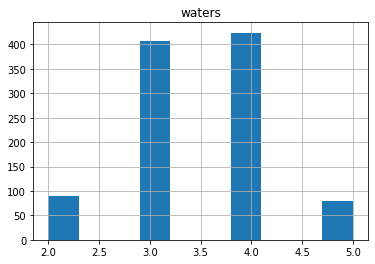

In [44]:
df.hist(bins = 10)


In [45]:
## == TEST CASES for Puzzle 2.3 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( len(df) >= 1000 ), "Your simulation must have at least 1,000 observations."
assert( 'waters' in df ), "Your simulation must have a column called `waters`."
assert( 3 < df['waters'].mean() < 4 ), "Your simulation should have a mean value around 3.5 -- you may want to check if your Puzzle 2 function is correct?"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print()
print(f"- You have a simulation that runs {len(df)} first 5 Pokemon encounters!")
print(f"- Simulated expected value of water encounters: {df['waters'].mean()} water encounters per first 5 encounters")


🎉 All tests passed! 🎉

- You have a simulation that runs 1000 first 5 Pokemon encounters!
- Simulated expected value of water encounters: 3.495 water encounters per first 5 encounters


## Puzzle 2.4: Random Variables of Simulations

❓ **Individual Reflection Question** ❓ Think about the simulation you just ran in Part 2. Consider the following questions:

* What is the random variable?
* What are the possible outcomes?

I think the random variable is just pulling the water pokemon out of 1000 simulations of pokemon.  The majority of the pokemon are water so it is more likely that I'll get some every time I pull 5 (expected value being about 3.5).

❓ **Group Discussion Question** ❓ How does the number of simulation runs relate to the distribution of the random variable (i.e. the statistics of the random variable)? Discuss with your group what advantages or limitations may exist in running simulations to estimate the statistics of a random variable. Have any of you seen an example of this in the world around you?

# Part 3: Your Random Variable

In your simulation, you created a random variable! Let's call this random variable $W$:

$W$ is the number of water pokemon you encounter in your first 5 encounters.


## Puzzle 3.1: Estimating Probability with Histogram

Using the histogram above, complete the following cells for the different probabilities of $W$ for various numbers of water pokemon. Remember! These are just probability estimates based off of your previous histogram! i.e. You can "eye-ball" it. You should **NOT** use `df` for this puzzle.

In [54]:
# Probability of 2 water pokemon:
W_2waters = 100/1000
W_2waters


0.1

In [56]:
# Probability of 3 water pokemon:
W_3waters = 400/1000
W_3waters


0.4

In [57]:
# Probability of 4 water pokemon:
W_4waters = 400/1000
W_4waters


0.4

In [58]:
# Probability of 5 water pokemon:
W_5waters =100/1000
W_5waters


0.1

#### Sanity Check

#### Sanity Check

Remember, all probabilities for a density histogram must add up to 1!  Let's see if yours do by running the cell below. If they don't, look at the histogram again and adjust them so that they add to 1!

In [59]:
W_all = W_2waters + W_3waters + W_4waters + W_5waters
W_all


1.0

Let's also check that your simulation matches (or nearly matches) your calculated probability:

In [60]:
# The result of this cell should be 0 or *VERY CLOSE* to 0:
P_5waters - W_5waters


-0.016666666666666677

In [61]:
## == TEST CASES for Puzzle 3.1 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( abs(W_2waters + W_3waters + W_4waters + W_5waters - 1.0) < 0.001 ), "Your probabilities must add up to 1.0!"
assert( abs(P_5waters - W_5waters) < 0.05), "The probability from your simulation must closely match the expected result (from Puzzle #1)"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


## Puzzle 3.2: Statistics on $W$: Mean

Based on what you developed for $W$, find the mean for $W$. In other words, find the expected value. The formula is in your notes from lecture. Compare the expected value with the simulation mean.

**Hint (double-click this cell to see it):** <span style="color:#ffffff00">Remember the formula for the expected value is X1*P1 + ... + Xn*Pn</span>


In [68]:
# Mean for W:
W_mean = W_2waters * 2 + W_3waters * 3 + W_4waters * 4 + W_5waters * 5
W_mean


3.5

**Hint (double-click this cell to see it):** <span style="color:#ffffff00">Use df and the mean() function to find the estimated mean of W</span>

In [69]:
# Also, estimated Mean for W:
W_mean_est = df["waters"].mean()
W_mean_est

3.495

Let's also check that your simulation mean matches (or nearly matches) your calculated expected value:

In [70]:
# The result of this cell should be 0 or *VERY CLOSE* to 0:
W_mean - W_mean_est


0.004999999999999893

In [71]:
## == TEST CASES for Puzzle 3.2 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( abs(W_mean-3.5) < 0.05 ), "Double check your formula for W_mean!"
assert( abs(W_mean-W_mean_est) < 0.1 ), "Double check your code for W_mean_est!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")


🎉 All tests passed! 🎉


## Puzzle 3.3: Statistics on $W$: Standard Deviation

Based on what you developed for $W$ and your mean of $W$, `W_mean`, find the standard deviation for $W$. In other words, find the standard error. The formula is in your notes from lecture. Compare the standard error with the simulation standard deviation.

**Hint (double-click this cell to see it):** <span style="color:#ffffff00">Remember the formula for the standard error is ( P1*(X1-Xm)^2 + ... + Pn*(Xn-Xm)^2 ) ^ 0.5</span>

In [77]:
# Standard Deviation for W:

# i am mad at you for this Heman
W_sd = (W_5waters * (5 - W_mean_est)**2 + W_4waters*(4 - W_mean_est)**2 + W_3waters*(3-W_mean_est)**2 + W_2waters*(2-W_mean_est)**2)**(1/2)
W_sd


0.8062412790226013

**Hint (double-click this cell to see it):** <span style="color:#ffffff00">Use df and the std() function to find the estimated standard deviation of W</span>

In [78]:
# Also, estimated standard deviation for W:
W_sd_est = df.std()
W_sd_est

waters    0.767179
dtype: float64

Let's also check that your simulation standard deviation matches (or nearly matches) your calculated standard error:

In [80]:
# The result of this cell should be 0 or *VERY CLOSE* to 0:
W_sd - W_sd_est


waters    0.039062
dtype: float64

In [79]:
## == TEST CASES for Puzzle 3.3 ==
# - This read-only cell contains test cases for your previous cell(s).
# - If this cell runs without any errors in the output, you PASSED all test cases!
# - If this cell results errors, check you previous cell, make changes, and RE-RUN your code and then this cell.
assert( abs(W_sd-0.76) < 0.2 ), "Double check your formula for W_sd!"
assert( abs(W_sd-W_sd_est) < 0.2 ), "Double check your code for W_sd_est!"

## == SUCCESS MESSAGE ==
# You will only see this message (with the emoji showing) if you passed all test cases:
tada = "\N{PARTY POPPER}"
print(f"{tada} All tests passed! {tada}")
print(f"Now go catch'em all!")


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

## Puzzle 3.4: Law of Large Numbers, Simulations, and Random Variables $\longrightarrow$ Statistical Analysis

❓ **Individual Reflection Question** ❓ Think about the simulation and random variable analysis you did in Parts 2 and 3. Consider the following questions:

* How does the number of simulation runs affect our estimates of the mean and standard deviation of the random variable $W$?
* How many simulation runs do you think is sufficient for estimating these statistics on $W$?

I think as we increase the number of simulations run, we will be closer and closer to the estimates of the mean and standard deviation.  I am not sure just by an educated guess how many simulations we need, but I know in analyzing models we need thousands to get the most accurate read.

❓ **Group Discussion Question** ❓ Discuss with your group whether or not you think simulation and random variable analysis can be used to test claims about a population (e.g. types of pokemon near you). Reflect on how you might have seen statistical analysis used in the world around you to test claims or hypotheses about a population. 


# Submit Your Work :)

You're almost done -- congratulations!

You need to do three more things:

1. Save your work. To do this, go to **File -> Save All**
2. After you have saved, exit this notebook and follow the [webpage instructions](https://discovery.cs.illinois.edu/stat107-fa21/labs/random_variable/) to commit this lab to your Git repository!
3. After you have updated your Git repository, check your submission in your [GitHub repository online](https://github-dev.cs.illinois.edu/stat107-fa21) to verify it was successful!